# Assignment 3 
Applied Data Science 
Name- Syed Qasim Kaif 
Reg no: 20BDS0343
Campus-VIT Vellore 


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [7]:
data=pd.read_csv("C:\\Users\\qasim\\Downloads\\Housing.csv")

In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [10]:
data.shape

(545, 12)

In [11]:
# Univariate, Bivariate, Multivaraite analysis 

<AxesSubplot:xlabel='area', ylabel='Count'>

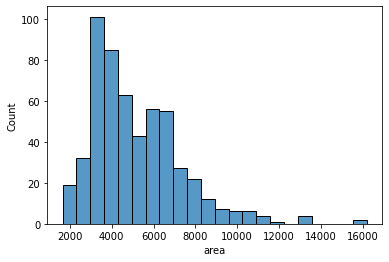

In [12]:
sns.histplot(data.area)

<AxesSubplot:xlabel='price', ylabel='Count'>

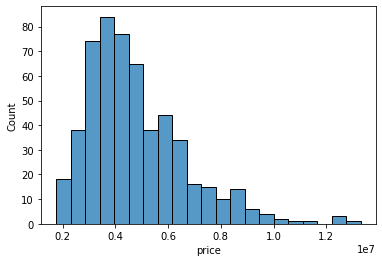

In [13]:
sns.histplot(data.price)

C:\Users\qasim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

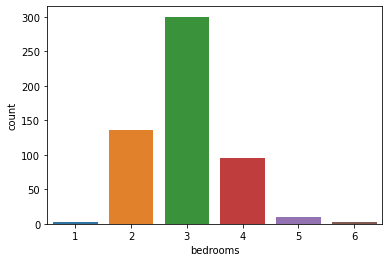

In [16]:
sns.countplot(data.bedrooms)

C:\Users\qasim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

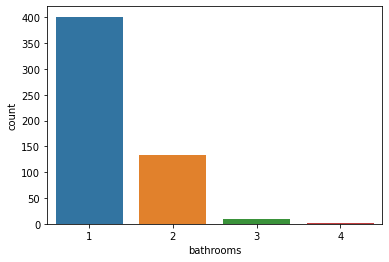

In [18]:
sns.countplot(data.bathrooms)

C:\Users\qasim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stories', ylabel='count'>

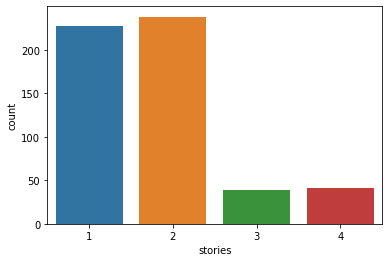

In [19]:
sns.countplot(data.stories)

C:\Users\qasim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

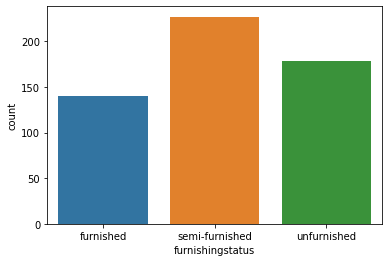

In [21]:
sns.countplot(data.furnishingstatus)

## 4 Descriptive statistics 

In [24]:
print("mean area: ",np.mean(data['area']))
print("median area: ",np.median(data['area']))
print("minimum area: ",np.min(data['area']))
print("maximum area: ",np.max(data['area']))

print("mean bedrooms: ",np.mean(data['bedrooms']))
print("median bedrooms: ",np.median(data['bedrooms']))
print("minimum bedrooms: ",np.min(data['bedrooms']))
print("maximum bedrooms: ",np.max(data['bedrooms']))

print("mean bathrooms: ",np.mean(data['bathrooms']))
print("median bathrooms: ",np.median(data['bathrooms']))
print("minimum bathrooms: ",np.min(data['bathrooms']))
print("maximum bathrooms: ",np.max(data['bathrooms']))

print("mean stories: ",np.mean(data['stories']))
print("median stories: ",np.median(data['stories']))
print("minimum stories: ",np.min(data['stories']))
print("maximum stories: ",np.max(data['stories']))

print("mean parking: ",np.mean(data['parking']))
print("median parking: ",np.median(data['parking']))
print("minimum parking: ",np.min(data['parking']))
print("maximum parking: ",np.max(data['parking']))

mean area:  5150.54128440367
median area:  4600.0
minimum area:  1650
maximum area:  16200
mean bedrooms:  2.9651376146788992
median bedrooms:  3.0
minimum bedrooms:  1
maximum bedrooms:  6
mean bathrooms:  1.2862385321100918
median bathrooms:  1.0
minimum bathrooms:  1
maximum bathrooms:  4
mean stories:  1.8055045871559634
median stories:  2.0
minimum stories:  1
maximum stories:  4
mean parking:  0.6935779816513762
median parking:  0.0
minimum parking:  0
maximum parking:  3


## checking for missing values 

In [25]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

### finding outliers and replacing them 

<AxesSubplot:ylabel='area'>

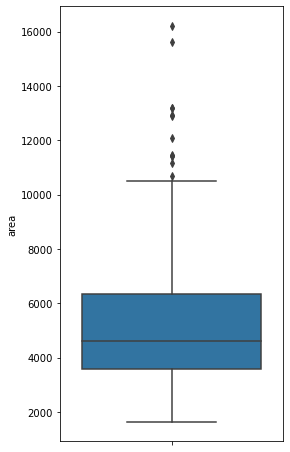

In [43]:

plt.figure(figsize = (4,8))
sns.boxplot(y=data.area)
    

In [44]:
## hence there are ouliers present in the column area therefore we need to replace them 

In [65]:
def out_iqr(data, area):
    global lower,upper
    q25, q75 = np.quantile(data[area], 0.25), np.quantile(data[area], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[area] > upper]
    df2 = data[data[area] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [66]:
out_iqr(data,'area')

The IQR is 2760.0
The lower bound value is -540.0
The upper bound value is 10500.0
Total number of outliers are 12


In [67]:
# hence we remove the value above the upper bound and the value below the lower bound 

In [68]:
data_new = data[(data['area'] < upper) | (data['area'] > lower)]

In [69]:
data_new.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


## Encoding of categorical columns 

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['mainroad']=le.fit_transform(data['mainroad'])
data['guestroom']=le.fit_transform(data['guestroom'])
data['basement']=le.fit_transform(data['basement'])
data['hotwaterheating']=le.fit_transform(data['hotwaterheating'])
data['airconditioning']=le.fit_transform(data['airconditioning'])
data['furnishingstatus']=le.fit_transform(data['furnishingstatus'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


## Spliting the data into X and Y

In [73]:
X=data.loc[:,['area','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','furnishingstatus']]
Y=data.loc[:,['price']]

In [74]:
X


,area,bedrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,3,1,0,0,0,1,2,0
1,8960,4,4,1,0,0,0,1,3,0
2,9960,3,2,1,0,1,0,0,2,1
3,7500,4,2,1,0,1,0,1,3,0
4,7420,4,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,0,0,2,2
541,2400,3,1,0,0,0,0,0,0,1
542,3620,2,1,1,0,0,0,0,0,2
543,2910,3,1,0,0,0,0,0,0,0


In [75]:
Y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


## Scaling the independent variables 

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data.loc[:,['area']]=scaler.fit_transform(data.loc[:,['area']])


In [77]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,1.046726,4,2,3,1,0,0,0,1,2,0
1,12250000,1.757010,4,4,4,1,0,0,0,1,3,0
2,12250000,2.218232,3,2,2,1,0,1,0,0,2,1
3,12215000,1.083624,4,2,2,1,0,1,0,1,3,0
4,11410000,1.046726,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,-0.991879,2,1,1,1,0,1,0,0,2,2
541,1767150,-1.268613,3,1,1,0,0,0,0,0,0,1
542,1750000,-0.705921,2,1,1,1,0,0,0,0,0,2
543,1750000,-1.033389,3,1,1,0,0,0,0,0,0,0


## train test split 

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(381, 10)
(164, 10)
(381, 1)
(164, 1)


## building the model

In [80]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

## training the model 

In [81]:
model.fit(X_train,Y_train)

LinearRegression()

### Testing the model 

In [83]:
y_pred=model.predict(X_test)
y_pred

array([[4339082.34198571],
       [6309577.80371009],
       [4851395.04804734],
       [8143961.87705835],
       [3256199.63621224],
       [6734041.56738833],
       [3487551.63543702],
       [3442795.59869322],
       [2828055.51217483],
       [8394913.04915515],
       [6449295.98597468],
       [4058010.03097441],
       [4244191.76469527],
       [5225359.47176737],
       [4437522.25371471],
       [2048093.56332236],
       [4381552.86343456],
       [3850249.6869008 ],
       [3658999.05938598],
       [4822079.46574718],
       [5581126.93197513],
       [6156363.77991903],
       [5015312.57813052],
       [2869284.75300506],
       [5414297.76965445],
       [5278061.64427537],
       [5275558.69025438],
       [5990005.59185303],
       [4199931.04578879],
       [5738170.34772641],
       [3351010.85799038],
       [6103708.73060273],
       [7398537.59199634],
       [2983853.24272564],
       [5002690.70734671],
       [5402855.65968471],
       [5825655.40873459],
 

In [84]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_pred)
mse

1234622483140.6753

In [85]:
rmse = np.sqrt(mse)
rmse

1111135.6726973872

In [86]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test, y_pred)
mae

864714.4593179617

In [87]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
r2

0.644075315325617